<a href="https://colab.research.google.com/github/noushadkhan01/ML-and-DL-by-SuperDataScience/blob/master/Machine-Learning/Part%203%20-%20Classification/Section%2014%20-%20Logistic%20Regression/Logistic_Regression/Logistic_Regression_on_ad_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/noushadkhan01/ML-and-DL-by-SuperDataScience.git

Cloning into 'ML-and-DL-by-SuperDataScience'...
remote: Enumerating objects: 327, done.
remote: Counting objects: 100% (327/327), done.
remote: Compressing objects: 100% (266/266), done.
remote: Total 327 (delta 118), reused 194 (delta 53), pack-reused 0
Receiving objects: 100% (327/327), 25.27 MiB | 17.36 MiB/s, done.
Resolving deltas: 100% (118/118), done.


#get all methods

In [2]:
%cd ML-and-DL-by-SuperDataScience/my_methods
from my_dummy_variable import MyDummyVariable
from visualise_classifier_performance import visualise_classifier_performance

/content/ML-and-DL-by-SuperDataScience/my_methods


In [3]:
%cd ../

/content/ML-and-DL-by-SuperDataScience


In [4]:
%cd Machine-Learning/Part 3 - Classification/Section 14 - Logistic Regression/Logistic_Regression/
!ls

/content/ML-and-DL-by-SuperDataScience/Machine-Learning/Part 3 - Classification/Section 14 - Logistic Regression/Logistic_Regression
Logistic_Regression_on_ad_dataset.ipynb  Social_Network_Ads.csv
logistic_regression.py			 visualise_classifier_performance.py
logistic_regression.R


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


#Data Preprocessing

as we can see **User ID** is not an important column so we drop it

In [9]:
evaluation = df.loc[np.random.randint(0, len(df), 3)]
evaluation

,User ID,Gender,Age,EstimatedSalary,Purchased
188,15674206,Male,35,72000,0
145,15746422,Female,24,89000,0
7,15694829,Female,32,150000,1


In [10]:
df = df.drop(evaluation.index.values)
df.shape

(397, 5)

In [11]:
X = df.drop(['User ID', 'Purchased'], axis = 1)
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [12]:
y = df.Purchased
y[:2]

0    0
1    0
Name: Purchased, dtype: int64

In [13]:
X.head(1)

,Gender,Age,EstimatedSalary
0,Male,19,19000


## Dummy variable

In [0]:
ohe = MyDummyVariable()

In [15]:
X = ohe.fit_transform(X)
X[:2]

array([[1.0e+00, 1.9e+01, 1.9e+04],
       [1.0e+00, 3.5e+01, 2.0e+04]])

In [16]:
evaluation

,User ID,Gender,Age,EstimatedSalary,Purchased
188,15674206,Male,35,72000,0
145,15746422,Female,24,89000,0
7,15694829,Female,32,150000,1


In [17]:
evaluation_X = evaluation.drop(['User ID', 'Purchased'], axis = 1)
evaluation_X

,Gender,Age,EstimatedSalary
188,Male,35,72000
145,Female,24,89000
7,Female,32,150000


In [18]:
evaluation_X = ohe.transform(evaluation_X)
evaluation_X

array([[1.0e+00, 3.5e+01, 7.2e+04],
       [0.0e+00, 2.4e+01, 8.9e+04],
       [0.0e+00, 3.2e+01, 1.5e+05]])

In [19]:
evaluation_y = evaluation.Purchased
evaluation_y

188    0
145    0
7      1
Name: Purchased, dtype: int64

### for Better visualisation of our predictive model we are dropping Gender Column
so

In [20]:
X = X[:, 1:]
evaluation_X = evaluation_X[:, 1:]
X.shape, evaluation_X.shape

((397, 2), (3, 2))

#Visualisation

In [0]:
import seaborn as sns

In [22]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

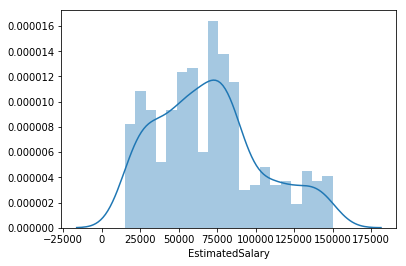

In [23]:
sns.distplot(df.EstimatedSalary, bins = 20)

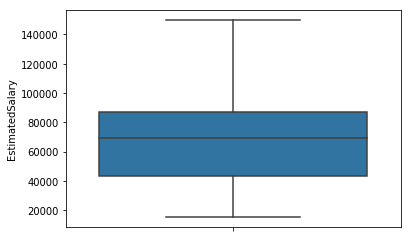

In [24]:
sns.boxplot(x = 'EstimatedSalary', orient = 'vertical', hue = 'Gender', data = df)

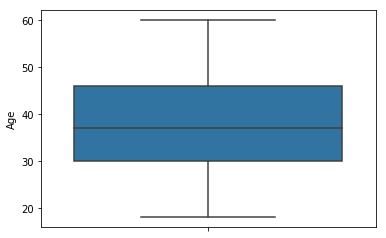

In [25]:
sns.boxplot(x = 'Age', orient = 'vertical', data = df)

#Build Model

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state  = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((317, 2), (80, 2), (317,), (80,))

##Feature scaling for accurate prediction

In [0]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_train[:2]

array([[-1.3614292 , -0.35947683],
       [-1.45860845, -0.65189191]])

In [31]:
X_test = sc_X.transform(X_test)
X_test[0]

array([-1.3614292 , -1.49989563])

In [32]:
model = LogisticRegression(C = 1)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

## Training dataset evaluation

In [34]:
#training classification report

print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       202
           1       0.85      0.67      0.75       115

    accuracy                           0.84       317
   macro avg       0.84      0.80      0.81       317
weighted avg       0.84      0.84      0.83       317



In [35]:
#confusion matrix
confusion_matrix(y_train, model.predict(X_train))

array([[188,  14],
       [ 38,  77]])

## Test set evaluation

In [36]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        53
           1       0.81      0.78      0.79        27

    accuracy                           0.86        80
   macro avg       0.85      0.84      0.84        80
weighted avg       0.86      0.86      0.86        80



In [37]:
confusion_matrix(y_test, model.predict(X_test))

array([[48,  5],
       [ 6, 21]])

#Visualise our model

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


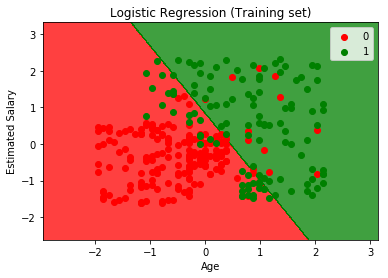

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


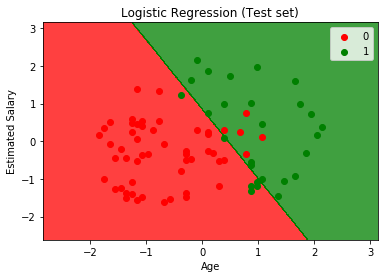

In [40]:
import warnings
warnings.filterwarnings('ignore')
visualise_classifier_performance(X_train, X_test, y_train, y_test, model)